# Churn Prediction

**Churn Prediction**, ou previsão de rotatividade de clientes, é uma técnica que utiliza **análises de dados para prever quais clientes têm maior probabilidade de cancelar um serviço** ou deixar de comprar um produto. Essa técnica é amplamente utilizada por empresas de diversos setores, como telecomunicações, varejo, serviços financeiros e tecnologia, para evitar a perda de clientes e melhorar a satisfação e fidelização dos mesmos.
A previsão de churn é importante porque a **rotatividade** de clientes pode ser **prejudicial** para uma empresa, podendo resultar em **perda de receitas**, **redução da participação de mercado** e **aumento dos custos de aquisição de clientes**. Além disso, a perda de clientes pode ser um sinal de **problemas em processos de atendimento** ao cliente ou produtos, que podem ser **corrigidos** para **melhorar a qualidade geral da empresa**.

<p align = "center">
<img src="Arquivos/churn.jpg" width=80%>
</p>

Ao prever quais clientes são mais propensos a cancelar um serviço ou deixar de comprar um produto, as empresas podem tomar **medidas preventivas para reduzir a rotatividade**. Isso pode incluir a criação de campanhas de retenção, melhoria da experiência do cliente e oferta de incentivos para permanecerem clientes.
**O objetivo do projeto é prever o churn utilizando avaliações estatísticas e algoritmos de Machine Learning.** Com isso, visamos **ajudar a empresa a entender melhor seus clientes e suas necessidades**, **identificar problemas** em seus processos de atendimento ao cliente ou produtos e **implementar melhorias significativas** em toda a empresa. Isso pode levar a uma **melhoria da experiência do cliente** e **aumentar a fidelização** e **satisfação do cliente**, resultando em uma **redução da rotatividade** e um **aumento das receitas**.



## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# Importação das bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score


In [688]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**
* `customerID`: identificador único do cliente
* `gender`: gênero do cliente (Male/Female)
* `SeniorCitizen`: variável binária que indica se o cliente é idoso ou aposentado (1) ou não (0)
* `Partner`: variável binária que indica se o cliente tem um parceiro (Yes) ou não (No)
* `Dependents`: variável binária que indica se o cliente tem dependentes (Yes) ou não (No)
* `tenure`: quantidade de meses que o cliente tem sido um assinante dos serviços da empresa
* `PhoneService`: variável binária que indica se o cliente tem serviço de telefone (Yes) ou não (No)
* `MultipleLines`: variável que indica se o cliente tem várias linhas telefônicas (Yes), uma única linha (No) ou nenhum serviço de telefone (No phone service)
* `InternetService`: variável que indica se o cliente tem serviço de internet com fibra óptica (Fiber optic), com a tecnologia DSL (DSL) ou sem serviço de internet (No)
* `OnlineSecurity`: variável que indica se o cliente tem segurança online (Yes), sem serviço de internet (No internet service) ou sem serviço de segurança (No)
* `OnlineBackup`: variável que indica se o cliente tem backup online (Yes), sem backup (No) ou sem serviço de internet (No internet service)
* `DeviceProtection`: variável que indica se o cliente tem proteção de dispositivo (Yes), sem proteção (No) ou sem serviço de internet (No internet service)
* `TechSupport`: variável que indica se o cliente tem suporte técnico (Yes), sem suporte (No) ou sem serviço de internet (No internet service)
* `StreamingTV`: variável que indica se o cliente tem serviço de streaming de TV (Yes), sem serviço de streaming de TV (No) ou sem serviço de internet (No internet service)
* `StreamingMovies`: variável que indica se o cliente tem serviço de streaming de filmes (Yes), sem serviço de streaming de filmes (No) ou sem serviço de internet (No internet service)
* `Contract`: variável que indica o tipo de contrato que o cliente tem com a empresa (Mensal, anual ou bianual)
* `PaperlessBilling`: variável binária que indica se o cliente optou por fatura eletrônica (Yes) ou não (No)
* `PaymentMethod`: variável que indica o método de pagamento que o cliente usa (Transferência bancária automática, Cartão de crédito automático, Cheque eletrônico ou Cheque enviado)
* `MonthlyCharges`: valor mensal cobrado ao cliente
* `TotalCharges`: valor total cobrado do cliente durante o tempo que foi assinante
* `Churn`: variável binária que indica se o cliente cancelou o serviço (Yes) ou não (No)

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a:

* *Contexto geral das variáveis*
* *Porcentagem de itens nulos*
* *Balanceamento do dataset*
* *Cancelamento em relação ao gênero*
* *Cancelamento em relação ao valor pago mensalmente*
* *Boxplot para variáveis numéricas*


Primeiramente, observaremos como estão dispostas as cinco primeiras entradas do dataset para ter uma visão ampla da estrutura de dados.

In [689]:
# Ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [690]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  7043
Variáveis:  21


In [691]:
# Extrair o nome das colunas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [692]:
# Extrair o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Pode-se perceber que a variável `TotalCharges`, que representa o **valor total** que foi cobrado ao cliente, está como object, mas deveria ser **float**. Não é possível fazer a conversão imediata pois há uma string ' ' que representa a ausência de valores. Portanto, a mudança será feita por uma função.

In [693]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [694]:
df.TotalCharges = df.TotalCharges.map(converter_str_float)

In [695]:
df.TotalCharges.isna().sum()

11

A coluna foi convertida, onde 11 valores estavam nulos, agora iremos extrair novamente o tipo das variáveis e a porcentagem de ausência.

In [696]:
# Extrair o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [697]:
# Porcentagem de itens nulos
round((df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100,2)

customerID          0.00
MonthlyCharges      0.00
PaymentMethod       0.00
PaperlessBilling    0.00
Contract            0.00
StreamingMovies     0.00
StreamingTV         0.00
TechSupport         0.00
DeviceProtection    0.00
OnlineBackup        0.00
InternetService     0.00
MultipleLines       0.00
PhoneService        0.00
tenure              0.00
Dependents          0.00
Partner             0.00
SeniorCitizen       0.00
gender              0.00
OnlineSecurity      0.00
Churn               0.00
TotalCharges        0.16
dtype: float64

In [698]:
# Quantidade de dados distribuidos por classes
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [699]:
# Porcentagem de dados distribuidos por classes
round(df.Churn.value_counts()/df.shape[0] * 100,4)

No     73.463
Yes    26.537
Name: Churn, dtype: float64

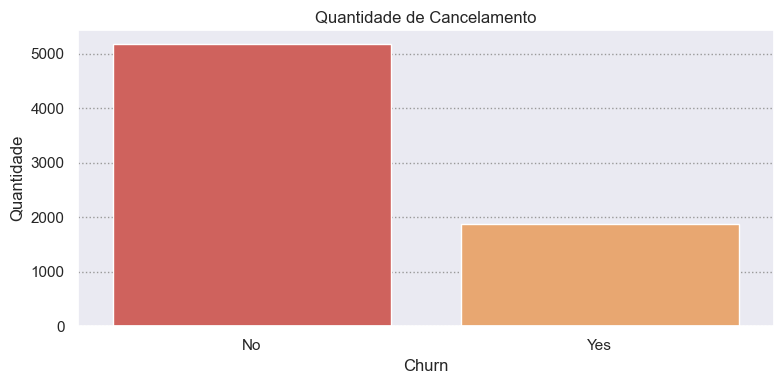

In [700]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Spectral"))
count = df['Churn'].value_counts()
sns.countplot(x='Churn', data=df)
ax.set_xlabel('Churn')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamento');
plt.tight_layout()

O dataset é  **desbalanceado**, com 26,53% de churn. Uma consequência de ter dados desbalanceados é um **modelo enviesado**, que privilegia a classe maioritária. Logo, é necessário um **balanceamento** a fim de construir um modelo eficaz ao problema. Verificaremos agora se há um **balanceamento entre os gêneros** e se há relação entre **gênero e cancelamento**.


In [701]:
# Quantidade de dados distribuidos por classes
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [702]:
# Porcentagem de dados distribuidos por classes
round(df.gender.value_counts()/df.shape[0] * 100,4)

Male      50.4756
Female    49.5244
Name: gender, dtype: float64

In [703]:
# Taxa de cancelamento por gênero
df['gender'].loc[df.Churn == 'Yes'].value_counts()/df.gender.value_counts() * 100

Female    26.920872
Male      26.160338
Name: gender, dtype: float64

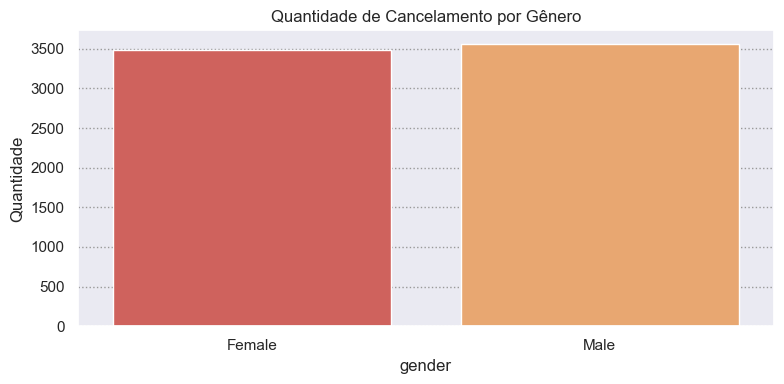

In [704]:
# Plotar um gráfico de barras para ver a quantidade de canelamento por gênero
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Spectral"))
count = df['gender'].loc[df.Churn == 'Yes'].value_counts()
sns.countplot(x='gender', data=df)
ax.set_xlabel('gender')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamento por Gênero');
plt.tight_layout()

Há medidas bastante semelhante, a quantidade de mulheres e homens está **balanceada**, e não há mudança significativa na taxa de cancelamento observando o gênero do cliente. Verificaremos agora se há uma relação entre o tipo de **contrato** e a quantidade de cancelamento.

In [705]:
df.Contract.loc[df.Churn == 'Yes'].value_counts()/df.Contract.value_counts() * 100

Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Contract, dtype: float64

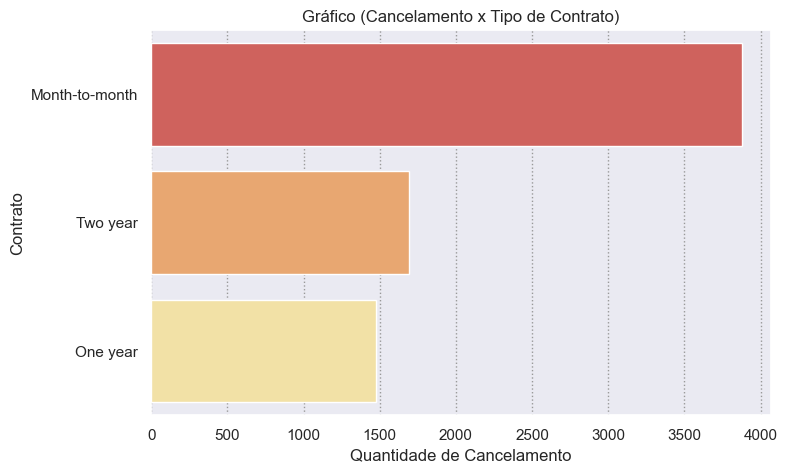

In [706]:
# plotar gráficos para as informações obtidas
fig, ax = plt.subplots(1, 1, figsize=(8,5))


# define informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
sns.set_palette(sns.color_palette("Spectral"))


# gráfico da média de preço por distrito
ax = sns.barplot(x=list(df.Contract.value_counts().values), y=list(df.Contract.value_counts().index), order= df.Contract.value_counts().sort_values(ascending = False).index, ax = ax)
ax.set_xlabel('Quantidade de Cancelamento')
ax.set_ylabel('Contrato')
ax.set_title("Gráfico (Cancelamento x Tipo de Contrato)");



Podemos perceber que de modo geral, os **contratos mensais** tendem a ter maior quantidade de **evasão** que os anuais e bianuais, que seguem a uma quantidade semelhante. A seguir um histograma para analisar qual frequência valor mensal é cobrado quando há cancelamento e quando não há.

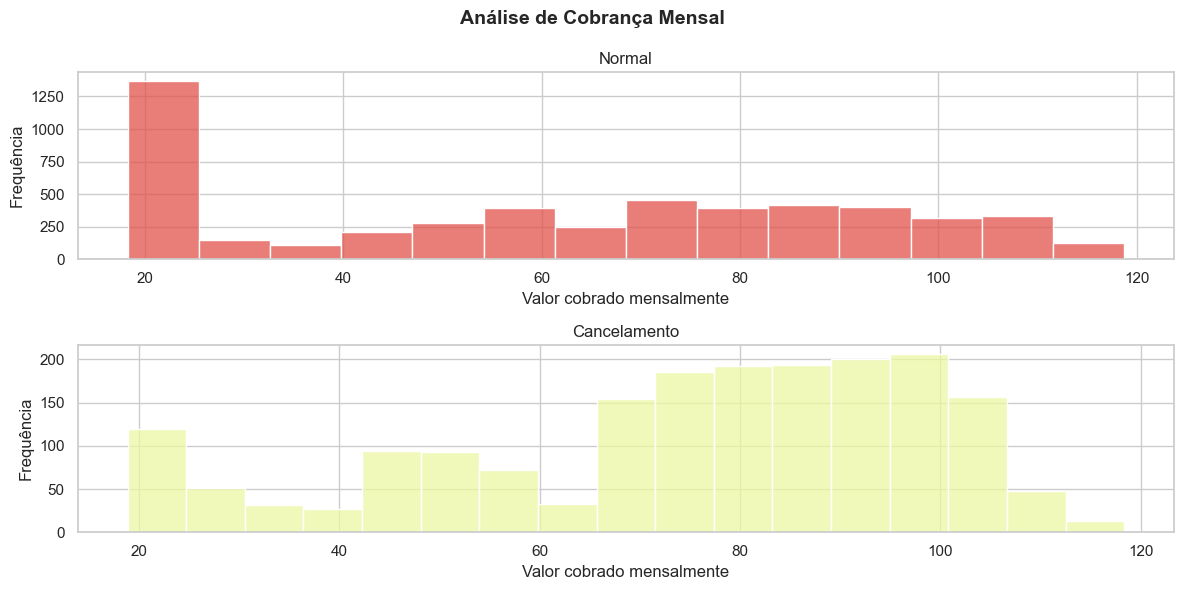

In [707]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Spectral"))
sns.histplot(data=df.MonthlyCharges.loc[df.Churn == 'No'], kde=False, ax = ax[0], color=sns.color_palette()[0])
sns.histplot(data=df.MonthlyCharges.loc[df.Churn == 'Yes'], kde=False, ax = ax[1], color=sns.color_palette()[3])
ax[0].set_xlabel('Valor cobrado mensalmente')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Normal');

ax[1].set_xlabel('Valor cobrado mensalmente')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Cancelamento');

fig.suptitle("Análise de Cobrança Mensal", fontsize=14, fontweight='bold')
plt.tight_layout()


De modo geral, pode-se concluir que quando **há cancelamento**, os **valores** cobrados **mensalmente** são **maiores**. Isso pode acontecer por diversos motivos, como por exemplo:

* Insatisfação com o produto ou serviço: quando o cliente não está satisfeito com o produto ou serviço oferecido pela empresa, ele pode cancelar e procurar um concorrente.

* Mudança na situação financeira: quando o cliente enfrenta problemas financeiros, pode precisar cortar gastos e optar por cancelar um serviço que considera menos essencial.

* Ofertas melhores da concorrência: quando o cliente encontra um produto ou serviço semelhante a um preço mais baixo ou com melhores condições em outra empresa, pode optar por cancelar o serviço atual e migrar para a concorrência.

Logo, o **preço da mensalidade é uma variável relevante**.

A variável `SeniorCitizen` indica se o cliente é idoso ou aposentado. A variável `tenure` diz respeito a quantidade de meses que o cliente tem sido um assinante dos serviços da empresa. A variável `MonthlyCharges` diz respeito ao quanto o cliente paga mensalmente pelo produto e `TotalCharges` ao valor total que foi pago enquanto assinante. A seguir um gráfico em boxplot que trará algumas informações estatísticas a respeito das variáveis.

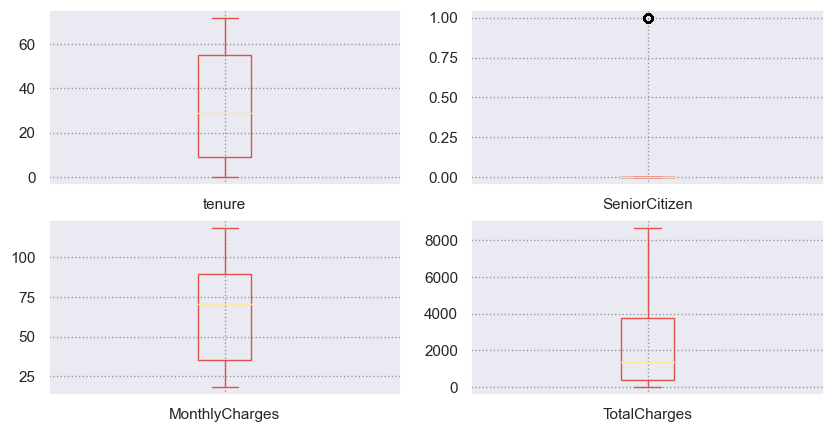

In [708]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
df.tenure.plot(kind = "box", ax = ax1)
df.SeniorCitizen.plot(kind = "box", ax = ax2)
df.MonthlyCharges.plot(kind = "box", ax = ax3)
df.TotalCharges.plot(kind = "box", ax = ax4);

Estatisticamente não há outliers na variáveis ou alguma informação discrepante. O tempo médio de utilizado do produto pelo usuário foi de aproximadamente 30 meses, já a mensalidade foi 70 e o valor total pago 1397. Os dados são coerentes.

## Preparar os Dados

Nesta etapa de preparação dos dados, será realizado um **pré-processamento básico**, apenas com a finalidade de construir um modelo base. 

As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`, também irei utilizá-la para a variável `Contract` que se demonstrou relevante. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos. O Label Encoding atribui um número inteiro a cada categoria exclusiva de uma variável categórica, com valores maiores para categorias que são consideradas mais importantes. O Dummy Encoding, por outro lado, transforma cada categoria exclusiva de uma variável categórica em uma nova variável binária (0 ou 1), indicando a presença ou ausência dessa categoria na observação

Iremos remover a variável `customerID`, pois se trata apenas de um número de identificação, não sendo relevante ao modelo. Também irei remover a variável `gender` pois não demonstrou relevância em relação à variável alvo.

In [709]:
# remover customerID e gender
df_clean = df.drop('customerID', axis = 1)
df_clean = df_clean.drop('gender', axis = 1)
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [710]:
# Cria o LabelEncoder
le = LabelEncoder()

cols_to_encode = ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']

# Itera sobre as colunas selecionadas e aplica o encoder
for col in cols_to_encode:
    df_clean[col] = le.fit_transform(df_clean[col])

# Imprime o dataframe com as colunas codificadas
df_clean[['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']].head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Contract,Churn
0,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0
2,0,0,0,1,1,0,1
3,0,0,0,0,0,1,0
4,0,0,0,1,1,0,1


In [711]:
# Seleciona as colunas a serem codificadas como dummy
cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaymentMethod']

# Aplica o get_dummies() em cada coluna selecionada
df_dummies = pd.get_dummies(df_clean[cols_to_encode], prefix=cols_to_encode)

# Concatena as variáveis dummy com o dataframe original
df_clean = pd.concat([df_clean, df_dummies], axis=1)

# Remove as colunas originais 
df_clean.drop(cols_to_encode, axis=1, inplace=True)

In [712]:
df_clean.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'Paym

In [713]:
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


## Modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.
Antes de realizar a padronização dos dados, irei separar o conjunto de teste que validará a eficácia do modelo. É importante que o mesmo seja capaz de generalizar para evitar problemas como o *underfitting*, que ocorre quando o modelo tem baixo desempenho tanto no treinamento quanto na validação, ou o *overfitting*, que ocorre quando o modelo se adapta demasiadamente ao treinamento e não consegue generalizar para novos dados. A separação antes da padronização ocorre para que os dados de teste não tenham contato com os de treino e validação, simulando uma situação real.

Existem vários métodos de divisão de dados disponíveis para evitar esses problemas. Neste caso, adotaremos a proporção de **70/15/15** para o conjunto de treinamento, validação e teste, respectivamente.

#### Separando o conjunto de teste

In [714]:
# criando o conjunto de teste
test = df_clean.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(1056, 38)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0,0,0,19,1,1,0,58.20,1045.25,0,...,0,0,1,1,0,0,0,0,1,0
4627,0,0,0,60,1,1,1,116.60,7049.50,0,...,0,0,1,0,0,1,0,1,0,0
3225,0,0,0,13,1,0,1,71.95,923.85,0,...,0,0,1,0,0,1,0,0,1,0
2828,0,0,0,1,1,2,0,20.45,20.45,0,...,0,1,0,0,1,0,0,0,0,1
3768,0,1,0,55,1,0,1,77.75,4266.40,0,...,1,0,0,1,0,0,0,1,0,0


In [715]:
# drop das linhas de teste
df_clean = df_clean.drop(test.index)

# verificando o shape do df
df_clean.shape

(5987, 38)

In [716]:
# resetando o index dos conjuntos
df_clean.reset_index()
test.reset_index()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2200,0,0,0,19,1,1,0,58.20,1045.25,...,0,0,1,1,0,0,0,0,1,0
1,4627,0,0,0,60,1,1,1,116.60,7049.50,...,0,0,1,0,0,1,0,1,0,0
2,3225,0,0,0,13,1,0,1,71.95,923.85,...,0,0,1,0,0,1,0,0,1,0
3,2828,0,0,0,1,1,2,0,20.45,20.45,...,0,1,0,0,1,0,0,0,0,1
4,3768,0,1,0,55,1,0,1,77.75,4266.40,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2229,0,1,0,4,1,0,0,70.50,294.20,...,1,0,0,1,0,0,0,0,1,0
1052,5109,0,1,1,66,1,2,0,65.85,4097.05,...,1,0,0,1,0,0,0,0,0,1
1053,5365,0,0,1,62,1,2,0,20.00,1250.10,...,0,1,0,0,1,0,1,0,0,0
1054,3903,0,0,0,53,1,0,1,80.60,4348.10,...,1,0,0,1,0,0,0,0,0,1


### Padronizar `tenure`, `MonthlyCharges` e `TotalCharges`

O objetivo do pré-processamento de dados é garantir que as features estejam na mesma escala, garantindo um desempenho melhor do algoritmo de *machine learning*. Para padronizar as variáveis `tenure`, `MonthlyCharges` e `TotalCharges` será utilizado o *StandardScaler*. Ele ajusta os dados para que tenham uma média zero e um desvio padrão de um.

In [717]:
# padronizar as colunas tenure, MonthlyCharges e TotalCharges
df_new = df_clean.copy()
std_scaler = StandardScaler()
df_new['std_tenure'] = std_scaler.fit_transform(df_clean['tenure'].values.reshape(-1, 1))
df_new['std_MonthlyCharges'] = std_scaler.fit_transform(df_clean['MonthlyCharges'].values.reshape(-1, 1))
df_new['std_TotalCharges'] = std_scaler.fit_transform(df_clean['TotalCharges'].values.reshape(-1, 1))
df_new.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

# ver as primeiras entradas
df_new.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
0,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.273120,-1.167925,-0.992944
1,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0.070187,-0.264396,-0.171735
2,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.232414,-0.367752,-0.958367
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0.517956,-0.752835,-0.193263
4,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.232414,0.194036,-0.939158


Com o conjunto de teste devidamente separado, e os dados posteriores padronizados, iremos criar o conjunto de treino e validação. Utilizaremos o teste para validar o modelo ao final.

Para utilizar o balanceamento, o X_train não pode conter valores nulos, como há 8 linhas contendo-os em `std_TotalCharges`, vamos excluí-las para então realizar o balanceamento.

In [718]:
# quantidade de linhas com valores nulos
df_new.std_TotalCharges.isna().sum()

8

In [719]:
# apaga as linhas com valores nulos
df_new.dropna(axis = 0, inplace=True)
# quantidade de linhas com valores nulos
df_new.std_TotalCharges.isna().sum()

0

In [720]:
# separar variáveis entre X e y
X = df_new.drop('Churn', axis=1)
y = df_new['Churn'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

### Balanceamento de Dados

Um dataset que possua mais de 50% das entradas em uma classe já é considerado desbalanceado. A maioria dos algoritmos de aprendizado de máquina funcionam bem com conjuntos de dados equilibrados, uma vez que eles buscam otimizar a precisão geral da classificação ou medidas relacionadas. Para dados **desbalanceados**, os limites de decisões estabelecidos por padrão nos algoritmos tendem a ser **enviesados em torno da classe majoritária**. Portanto a **classe minoritária tende a ser classificada incorretamente.**
A técnica de **over-sampling**, consiste em **gerar novos exemplos para a classe minoritária**, de forma a aumentar sua representatividade no conjunto de dados. Utilizaremos **ADASYN** em **over-sampling**. Também será utilizado diversos modelos de classificação em *machine learning*, como **Logistic Regression**, **KNeighbors**, **Decision Tree**, **Random Forest**, **Support Vector Machine** e **XGBoost**. Já o **under-sampling** consiste em **remover exemplos da classe majoritária**, usaremos a técnica de **Random Under Sampling** que o faz aleatóriamente e os testaremos nos modelos descritos anteriormente.



### ADASYN

ADASYN (Adaptive Synthetic Sampling) é um método de oversampling (superamostragem) que gera amostras sintéticas para classes minoritárias em conjuntos de dados desbalanceados. Ele é uma extensão do método SMOTE (Synthetic Minority Over-sampling Technique), que gera amostras sintéticas para as classes minoritárias em um conjunto de dados.

O ADASYN utiliza uma abordagem adaptativa para gerar amostras sintéticas. Ele pondera as amostras sintéticas de forma diferente com base em quão difícil é gerar essas amostras. Em outras palavras, ele cria mais amostras sintéticas para as amostras minoritárias que são mais difíceis de gerar e menos para as amostras que são mais fáceis de gerar.

In [721]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [722]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled))

Tamanho do y_train: (5082,)
Tamanho do y_resampled: (7432,)


In [723]:
# ver o balanceamento das classes
print(pd.Series(y_resampled).value_counts())

0    3719
1    3713
Name: Churn, dtype: int64


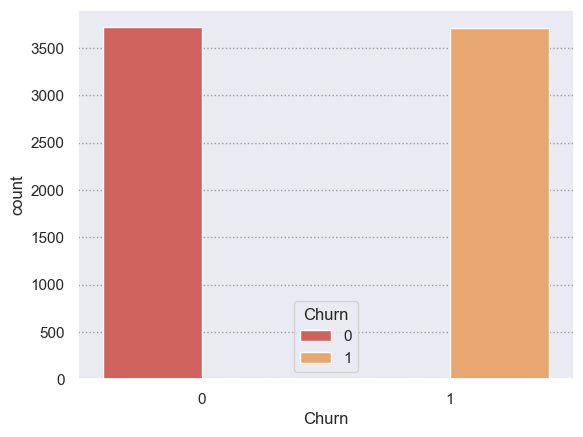

In [724]:
# plotar a nova distribuição de classes
sns.countplot(x=y_resampled, hue=y_resampled);

### RandomUnderSampler

O **RandomUnderSampler** é uma técnica de undersampling, usada para lidar com conjuntos de dados desbalanceados, onde uma das classes é muito menor do que as outras. A ideia por trás do undersampling é reduzir a quantidade de amostras da classe majoritária para equilibrar as proporções entre as classes. O RandomUnderSampler é uma técnica simples que **remove aleatoriamente amostras da classe majoritária** até que o número de amostras na classe majoritária corresponda ao número de amostras da classe minoritária. Essa técnica pode ser eficaz para reduzir o viés do modelo em direção à classe majoritária e melhorar a precisão das previsões para a classe minoritária.

In [725]:
# instanciando o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# aplicando o RandomUnderSampler ao conjunto de dados
X_under, y_under = rus.fit_resample(X_train, y_train)

In [726]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_under))

Tamanho do y_train: (5082,)
Tamanho do y_resampled: (2726,)


In [727]:
# ver o balanceamento das classes
print(pd.Series(y_under).value_counts())

0    1363
1    1363
Name: Churn, dtype: int64


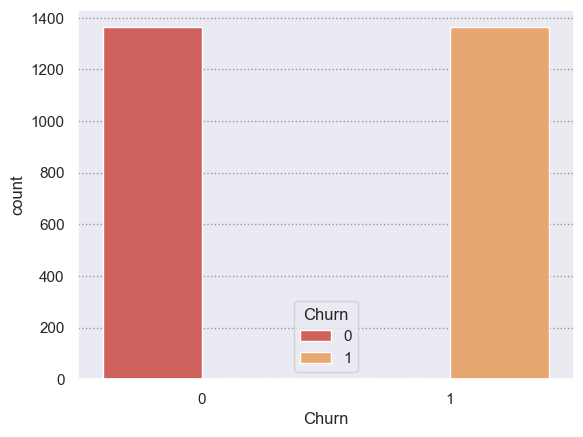

In [728]:
# plotar a nova distribuição de classes
sns.countplot(x=y_under, hue=y_under);

## Treinamento dos Algoritmos de *Machine Learning* aplicado às amostras

Para o **treinamento** utilizaremos diversos algoritmos de Machine Learning. Para validar se tivemos um bom resultado com o treinamento, utilizaremos algumas **métricas** para modelos de classificação, como **matriz de confusão, acurácia, recall, precision, F-1 score, support e AUC.** Sendo priorizado o **recall**, que  é a **proporção de exemplos positivos que o modelo classificou corretamente em relação a todos os exemplos positivos.**

* Regressão Logística: Um algoritmo simples e eficaz baseado em regressão linear, adaptado para problemas de classificação binária.

* k-Nearest Neighbors (k-NN): Um algoritmo baseado em instância que classifica um objeto com base na classe majoritária de seus k vizinhos mais próximos.

* Árvores de Decisão: Algoritmos que constroem uma árvore de decisão com base nos atributos dos dados de treinamento, permitindo classificações rápidas e interpretação visual do processo de decisão.

* Random Forest: Um método de conjunto que constrói várias árvores de decisão e combina suas previsões para obter uma classificação mais precisa e robusta.

* Support Vector Machines (SVM): Um algoritmo que busca encontrar o hiperplano que melhor separa as classes no espaço de características, maximizando a margem entre as classes.

* XGBoost: Uma implementação otimizada do Gradient Boosting com foco em eficiência computacional e flexibilidade de modelage

In [729]:
# Instanciação dos classificadores
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
xgboost = XGBClassifier()

A validação cruzada é uma técnica que permite avaliar o desempenho do modelo dividindo os dados em k partições (folds), treinando o modelo em k-1 partições e testando-o na partição restante, repetindo esse processo k vezes. Ela é usada para estimar a performance do modelo em dados não vistos e ajuda a evitar problemas de sobreajuste (overfitting) ou subajuste (underfitting). A utilizaremos durante o treinamento dos nossos modelos.

In [730]:
classifiers = [
    ('Logistic Regression', logistic_regression),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Support Vector Machines', svc),
    ('XGBoost', xgboost)
]

recall = []
model = []

for name, clf in classifiers:
    
    # Realizar a validação cruzada no conjunto de treinamento
    scores = cross_val_score(clf, X_resampled, y_resampled, scoring='recall')  
    recall.append(scores.mean())
    model.append(clf.__class__.__name__)
    
recall_sorted, model_sorted = zip(*sorted(zip(recall, model), reverse=True))
pd.DataFrame(data=recall_sorted, index=model_sorted, columns=['Recall - Oversampling'])

,Recall - Oversampling
KNeighborsClassifier,0.914883
RandomForestClassifier,0.870200
SVC,0.855394
XGBClassifier,0.836047
LogisticRegression,0.828483
DecisionTreeClassifier,0.747130


In [731]:
classifiers = [
    ('Logistic Regression', logistic_regression),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Support Vector Machines', svc),
    ('XGBoost', xgboost)
]

recall = []
model = []

for name, clf in classifiers:
    
    # Realizar a validação cruzada no conjunto de treinamento
    scores = cross_val_score(clf, X_under, y_under, scoring='recall')  
    recall.append(scores.mean())
    model.append(clf.__class__.__name__)
    
recall_sorted, model_sorted = zip(*sorted(zip(recall, model), reverse=True))
pd.DataFrame(data=recall_sorted, index=model_sorted, columns=['Recall - Undersampling'])

,Recall - Undersampling
KNeighborsClassifier,0.810685
LogisticRegression,0.799688
SVC,0.788690
RandomForestClassifier,0.768132
XGBClassifier,0.757132
DecisionTreeClassifier,0.697729


A técnica com melhor recall em ambos os balanceamentos foi o KNeighbors. Dadas as características do problema e o desempenho durante as execuções anteriores, optei pela otimização dos hiperparâmetros do KNN.

## Otimização dos Hiperparâmetros - KNN

Uma das formas mais comuns de otimizar os hiperparâmetros do modelo de KNN é utilizando o GridSearchCV do scikit-learn. O GridSearchCV é uma ferramenta que permite testar várias combinações de hiperparâmetros de um modelo, treinando e avaliando cada modelo para encontrar a melhor combinação de hiperparâmetros para o conjunto de dados em questão. 

In [732]:
# Definir a lista de valores a serem testados
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2, 3],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Definir o objeto KNN
knn = KNeighborsClassifier()

# Definir o objeto GridSearchCV com os parâmetros desejados
grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=10, n_jobs=-1)

# Ajustar os hiperparâmetros com GridSearchCV no conjunto de treinamento reamostrado
grid_search.fit(X_resampled, y_resampled)

# Extrair os melhores parâmetros do objeto grid_search
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

# Imprimir os melhores parâmetros e recall
print("Melhores hiperparâmetros:", best_params)
print("Melhor recall (validação cruzada): {:.4f}".format(best_recall))

# Criar um novo objeto KNN com os melhores parâmetros encontrados e treinar no conjunto de treinamento reamostrado
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_resampled, y_resampled)

# Realizar a previsão no conjunto de teste
y_pred = best_knn.predict(X_test)

# Calcular o F1-score e a AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Imprimir o relatório de classificação, F1-score e AUC-ROC
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
print("F1-score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(auc_roc))

Melhores hiperparâmetros: {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Melhor recall (validação cruzada): 0.9246
Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8866    0.6677    0.7617       656
           1     0.4591    0.7676    0.5745       241

    accuracy                         0.6945       897
   macro avg     0.6728    0.7177    0.6681       897
weighted avg     0.7718    0.6945    0.7114       897

F1-score: 0.5745
AUC-ROC: 0.7177


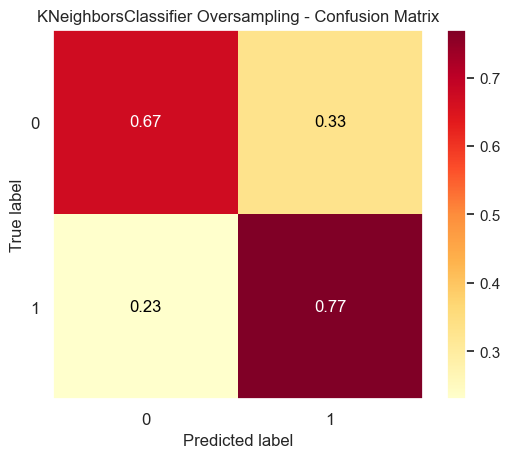

In [733]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='YlOrRd')
plt.title("KNeighborsClassifier Oversampling - Confusion Matrix");

In [734]:
# Definir a lista de valores de K a serem testados
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2, 3],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
# Definir o objeto KNN
knn = KNeighborsClassifier()

# Definir o objeto GridSearchCV com os parâmetros desejados
grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=10, n_jobs=-1)

# Ajustar os hiperparâmetros com GridSearchCV no conjunto de treinamento reamostrado
grid_search.fit(X_under, y_under)

# Extrair os melhores parâmetros do objeto grid_search
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

# Imprimir os melhores parâmetros e recall
print("Melhores hiperparâmetros:", best_params)
print("Melhor recall (validação cruzada): {:.4f}".format(best_recall))

# Criar um novo objeto KNN com os melhores parâmetros encontrados e treinar no conjunto de treinamento reamostrado
best_knn_under = KNeighborsClassifier(**best_params)
best_knn_under.fit(X_under, y_under)

# Realizar a previsão no conjunto de teste
y_pred_under = best_knn_under.predict(X_test)

# Calcular o F1-score e a AUC-ROC
f1 = f1_score(y_test, y_pred_under)
auc_roc = roc_auc_score(y_test, y_pred_under)

# Imprimir o relatório de classificação, F1-score e AUC-ROC
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
print("F1-score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(auc_roc))

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Melhor recall (validação cruzada): 0.8320
Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8866    0.6677    0.7617       656
           1     0.4591    0.7676    0.5745       241

    accuracy                         0.6945       897
   macro avg     0.6728    0.7177    0.6681       897
weighted avg     0.7718    0.6945    0.7114       897

F1-score: 0.6154
AUC-ROC: 0.7571


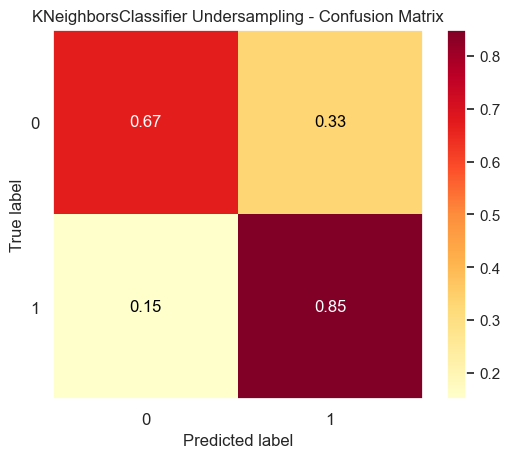

In [735]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_under, normalize=True, cmap='YlOrRd')
plt.title("KNeighborsClassifier Undersampling - Confusion Matrix");

## Avaliação do Modelo Utilizando os Dados de Teste

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

### Padronização no conjunto de teste

In [738]:
# padronizar as colunas Tenure, MonthlyCharges e TotalCharges
std_scaler = StandardScaler()
test['std_tenure'] = std_scaler.fit_transform(test['tenure'].values.reshape(-1, 1))
test['std_MonthlyCharges'] = std_scaler.fit_transform(test['MonthlyCharges'].values.reshape(-1, 1))
test['std_TotalCharges'] = std_scaler.fit_transform(test['TotalCharges'].values.reshape(-1, 1))
test.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)
test.dropna(axis = 0, inplace = True) # deleta linhas com valores nan

# ver as primeiras entradas
test.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
2200,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,-0.567775,-0.192426,-0.555651
4627,0,0,0,1,1,1,0,0,0,1,...,0,0,1,0,1,0,0,1.105521,1.715511,2.079870
3225,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,-0.812648,0.256789,-0.608939
2828,0,0,0,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,-1.302393,-1.425725,-1.005479
3768,0,1,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0.901461,0.446276,0.858249


In [739]:
# separar variáveis entre X e y
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

### Balanceamento de dados

In [740]:
# tamanho dos dados de teste
test.shape

(1053, 38)

In [741]:
# balanceamento dos dados de teste
test.Churn.value_counts()

0    788
1    265
Name: Churn, dtype: int64

In [743]:
# Under-sampling
y_pred_under = best_knn_under.predict(X_test)
y_prob_under = best_knn_under.predict_proba(X_test)

# Over-sampling 
y_pred_over = best_knn.predict(X_test)
y_prob_over = best_knn.predict_proba(X_test)

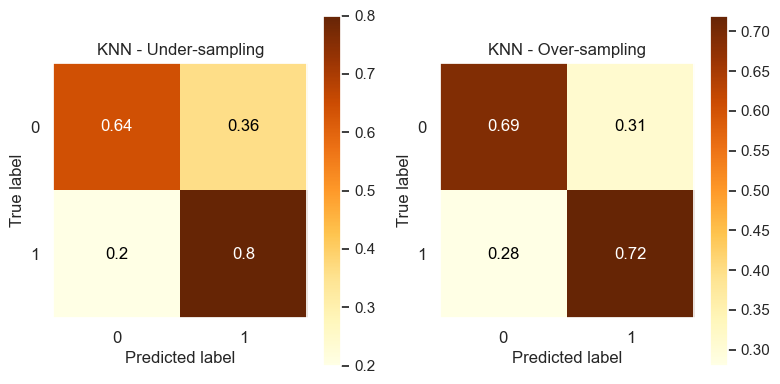

In [744]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_under, normalize=True, cmap = 'YlOrBr', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_over, normalize=True, cmap = 'YlOrBr', ax = ax[1])

ax[0].set_title("KNN - Under-sampling")
ax[1].set_title("KNN - Over-sampling")

plt.tight_layout();

In [746]:
# imprimir a área sob da curva
print("AUC KNN - Under-sampling: {:.4f}\n".format(roc_auc_score(y_test, y_pred_under)))
print("AUC KNN - Over-sampling: {:.4f}\n".format(roc_auc_score(y_test, y_pred_over)))

AUC KNN - Under-sampling: 0.7217

AUC KNN - Over-sampling: 0.7049



## Conclusão

Com base nas análises realizadas, pode-se concluir que a escolha do **modelo de classificação** e da **técnica de balanceamento de classes** é fundamental para obter um bom desempenho no problema de Churn.

Observou-se um desempenho semelhante no conjunto de testes e no conjunto de validação. A técnica de balanceamento undersampling apresentou métricas ligeiramente superiores, com 0.8 de recall para a classe minoritária e AUC de 0.72 nos dados de teste, e 0.85 e 0.75, respectivamente, nos dados de validação. Por outro lado, o oversampling obteve 0.72 de recall para a classe majoritária e 0.70 de AUC nos dados de teste, e 0.77 e 0.71, respectivamente, nos dados de validação.

Dos algoritmos de machine learning testados, o **KNeighbors** foi o que obteve **maior métrica** em relação ao **recall,** com 0.91 para oversampling e 0.81 para undersampling. Além disso, foi possível observar a importância do pré-processamento de dados, incluindo a transformação de variáveis categóricas usando o label encoder e dummy variables, bem como a padronização para se chegar a um modelo com desempenho eficaz.